In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

# Data cleaning and Pre-processing 

In [132]:
#header creation and directory paths

usage_dir = "task_usage/"
job_dir = "job_events/"

task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

job_header = ['timestamp','missing_info', 'job_id', 'event_type', 'user_name', 'scheduling_class',
              'job_name','logical_job_name']

In [133]:
#read csv - drop unused columns

final_df = pd.DataFrame()

# 3 files used for each category
for i in range(3):
    file_str = str(i).zfill(5)
    usage_df = pd.read_csv(usage_dir +"part-"+file_str+"-of-00500.csv.gz",header=None)
    usage_df.columns = task_usage_header
#     print(usage_df)
    job_df = pd.read_csv(job_dir +"part-"+file_str+"-of-00500.csv.gz",header=None)
    job_df.columns = job_header
#     print(job_df)
    job_df.drop(['missing_info','user_name', 'scheduling_class',
                  'job_name','logical_job_name'], axis =1,inplace=True)

    usage_df.drop(['task_index','machine_id','canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                         'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                         'agg_type', 'sample_cpu_usage'], axis =1,inplace=True)

    #merge to filter jobs with valid life - SCHEDULE to FINISH

    new_jobdf = pd.merge(job_df[(job_df['event_type'] == 1)],job_df[ (job_df['event_type'] == 4)], on = "job_id")
    new_jobdf.drop(['event_type_x',  'event_type_y'], axis =1,inplace=True)
    new_jobdf['life_time'] = new_jobdf['timestamp_y'] -  new_jobdf['timestamp_x']
    new_jobdf.drop(['timestamp_x',  'timestamp_y'], axis =1,inplace=True)
    #new_jobdf
    #merge to get cpu usage of jobs with valid lifetime

    n_jobdf = pd.merge(usage_df,new_jobdf, on = "job_id")
    n_jobdf['start_time'] = (n_jobdf['start_time']/1000000)
    n_jobdf['end_time'] = (n_jobdf['end_time']/1000000)
    n_jobdf['life_time'] = (n_jobdf['life_time']/1000000)
#     print(n_jobdf)
    #n_jobdf
    # arrage cpu uses by jobs- add parallel cpu uses of all tasks of a jobs during a time cycle
    final_df = final_df.append(n_jobdf.groupby(['job_id','start_time','end_time']).sum())

final_df

mean_cpu_usage    life_time
job_id     start_time end_time                             
6245463804 600.0      900.0           0.000050  3452.681356
           900.0      1200.0          0.000050  3452.681356
           1200.0     1500.0          0.000050  3452.681356
           1500.0     1800.0          0.000052  3452.681356
           1800.0     2100.0          0.000045  3452.681356
           2100.0     2400.0          0.000045  3452.681356
           2400.0     2700.0          0.000048  3452.681356
           2700.0     3000.0          0.000053  3452.681356
           3000.0     3300.0          0.001850  3452.681356
           3300.0     3442.0          0.000791  3452.681356
           3442.0     3456.0          0.000588  3452.681356
           3456.0     3457.0          0.000000  3452.681356
6248941479 600.0      900.0           0.000280  4219.709190
           900.0      1200.0          0.000276  4219.709190
           1200.0     1500.0          0.000277  4219.709190
           1500.0     1800.0          0.000272  4219.709190
           1800.0     2100.0          0.000277  4219.709190
           2100.0     2400.0          0.000277  4219.709190
           2400.0     2700.0          0.000287  4219.709190
           2700.0     3000.0          0.000288  4219.709190
           3000.0     3300.0          0.000290  4219.709190
           3300.0     3600.0          0.000290  4219.709190
           3600.0     3900.0          0.000290  4219.709190
           3900.0     4200.0          0.000593  4219.709190
           4200.0     4206.0          0.035770  4219.709190
           4206.0     4221.0          0.000360  4219.709190
           4221.0     4223.0          0.000000  4219.709190
6248963537 600.0      900.0           0.006172  4192.771235
           900.0      1200.0          0.006042  4192.771235
           1200.0     1500.0          0.005615  4192.771235
...                                        ...          ...
6252611478 15561.0    15562.0         0.000000    71.959513
6252613795 15504.0    15525.0         0.020390    34.393809
           15525.0    15537.0         0.000118    34.393809
           15537.0    15538.0         0.000000    34.393809
6252613856 15512.0    15514.0         0.000000    28.401080
           15514.0    15527.0         0.000071    28.401080
           15527.0    15528.0         0.000000    28.401080
6252613981 15502.0    15579.0         0.000000   100.731550
           15579.0    15590.0         0.004082   100.731550
           15590.0    15600.0         0.000656   100.731550
           15600.0    15601.0         0.000000   100.731550
           15601.0    15603.0         0.000000   100.731550
6252615034 15532.0    15534.0         0.000000    15.195577
           15534.0    15546.0         0.000100    15.195577
           15546.0    15547.0         0.000000    15.195577
6252615952 15568.0    15570.0         0.000008    29.992404
           15570.0    15583.0         0.000095    29.992404
           15583.0    15584.0         0.000000    29.992404
6252616302 15581.0    15582.0         0.000000    30.114354
           15582.0    15596.0         0.000072    30.114354
           15596.0    15597.0         0.000000    30.114354
           15597.0    15600.0         0.000000    30.114354
6252617480 15619.0    15621.0         0.000686    26.571918
           15621.0    15633.0         0.000025    26.571918
           15633.0    15635.0         0.000000    26.571918
6252617482 15614.0    15624.0         0.005920    20.890096
           15624.0    15635.0         0.000887    20.890096
6252617531 15620.0    15624.0         0.003628    24.966217
           15624.0    15633.0         0.000223    24.966217
           15633.0    15634.0         0.000000    24.966217

[11539 rows x 2 columns]

# Sample Distribution Plots

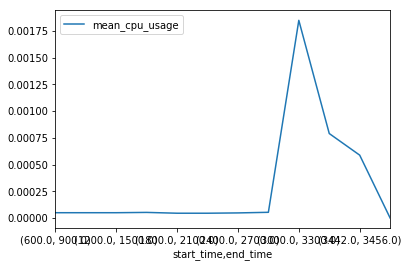

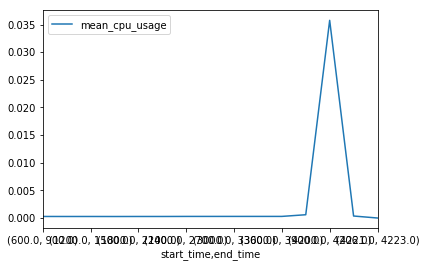

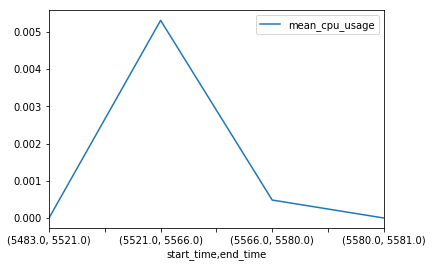

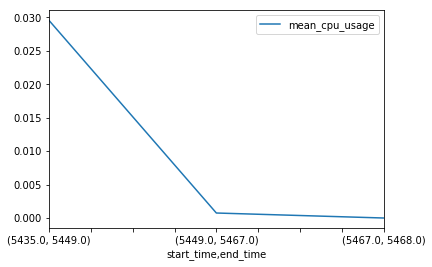

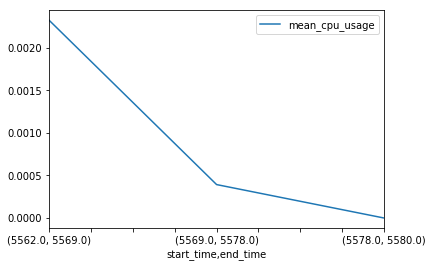

In [134]:
#5 plots of random jobs and their cpu usages

final_df.loc[6245463804]['mean_cpu_usage'].plot(legend=True)
plt.show()

final_df.loc[6248941479]['mean_cpu_usage'].plot(legend=True)
plt.show()

final_df.loc[6252015953]['mean_cpu_usage'].plot(legend=True)
plt.show()

final_df.loc[6252014624]['mean_cpu_usage'].plot(legend=True)
plt.show()

final_df.loc[6252018909]['mean_cpu_usage'].plot(legend=True)
plt.show()

# Data normalization and Binning

In [135]:
#normalising the mean cpu usage - y axis

for i in final_df.index.get_level_values(0).unique():
    minn = final_df.loc[i]['mean_cpu_usage'].min()
    maxx = final_df.loc[i]['mean_cpu_usage'].max() 
    final_df.loc[i]['mean_cpu_usage'] = (final_df.loc[i]['mean_cpu_usage'] - minn)/(maxx-minn)
    
final_df

/Users/banani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mean_cpu_usage    life_time
job_id     start_time end_time                             
6245463804 600.0      900.0           0.000050  3452.681356
           900.0      1200.0          0.000050  3452.681356
           1200.0     1500.0          0.000050  3452.681356
           1500.0     1800.0          0.000052  3452.681356
           1800.0     2100.0          0.000045  3452.681356
           2100.0     2400.0          0.000045  3452.681356
           2400.0     2700.0          0.000048  3452.681356
           2700.0     3000.0          0.000053  3452.681356
           3000.0     3300.0          0.001850  3452.681356
           3300.0     3442.0          0.000791  3452.681356
           3442.0     3456.0          0.000588  3452.681356
           3456.0     3457.0          0.000000  3452.681356
6248941479 600.0      900.0           0.000280  4219.709190
           900.0      1200.0          0.000276  4219.709190
           1200.0     1500.0          0.000277  4219.709190
           1500.0     1800.0          0.000272  4219.709190
           1800.0     2100.0          0.000277  4219.709190
           2100.0     2400.0          0.000277  4219.709190
           2400.0     2700.0          0.000287  4219.709190
           2700.0     3000.0          0.000288  4219.709190
           3000.0     3300.0          0.000290  4219.709190
           3300.0     3600.0          0.000290  4219.709190
           3600.0     3900.0          0.000290  4219.709190
           3900.0     4200.0          0.000593  4219.709190
           4200.0     4206.0          0.035770  4219.709190
           4206.0     4221.0          0.000360  4219.709190
           4221.0     4223.0          0.000000  4219.709190
6248963537 600.0      900.0           0.006172  4192.771235
           900.0      1200.0          0.006042  4192.771235
           1200.0     1500.0          0.005615  4192.771235
...                                        ...          ...
6252611478 15561.0    15562.0         0.000000    71.959513
6252613795 15504.0    15525.0         0.020390    34.393809
           15525.0    15537.0         0.000118    34.393809
           15537.0    15538.0         0.000000    34.393809
6252613856 15512.0    15514.0         0.000000    28.401080
           15514.0    15527.0         0.000071    28.401080
           15527.0    15528.0         0.000000    28.401080
6252613981 15502.0    15579.0         0.000000   100.731550
           15579.0    15590.0         0.004082   100.731550
           15590.0    15600.0         0.000656   100.731550
           15600.0    15601.0         0.000000   100.731550
           15601.0    15603.0         0.000000   100.731550
6252615034 15532.0    15534.0         0.000000    15.195577
           15534.0    15546.0         0.000100    15.195577
           15546.0    15547.0         0.000000    15.195577
6252615952 15568.0    15570.0         0.000008    29.992404
           15570.0    15583.0         0.000095    29.992404
           15583.0    15584.0         0.000000    29.992404
6252616302 15581.0    15582.0         0.000000    30.114354
           15582.0    15596.0         0.000072    30.114354
           15596.0    15597.0         0.000000    30.114354
           15597.0    15600.0         0.000000    30.114354
6252617480 15619.0    15621.0         0.000686    26.571918
           15621.0    15633.0         0.000025    26.571918
           15633.0    15635.0         0.000000    26.571918
6252617482 15614.0    15624.0         0.005920    20.890096
           15624.0    15635.0         0.000887    20.890096
6252617531 15620.0    15624.0         0.003628    24.966217
           15624.0    15633.0         0.000223    24.966217
           15633.0    15634.0         0.000000    24.966217

[11539 rows x 2 columns]

In [136]:
#function to calculate values in each bin of each job's cpu uasge distribution

def calc_point(x1,y1,x2,y2,point):
    y=(point-x1)*(y2-y1)/(x2-x1)+y1
    if math.isnan(y):
        return -1000
    return y
def calculateValues(dataframe):
    my_points=[]
    start_index = 0
    next_index=1
    row0 = dataframe.iloc[start_index]
    row1 = dataframe.iloc[next_index]
    point = row0.end_time
    x1= row0.end_time
    x2= row1.end_time
    y1= row0.mean_cpu_usage
    y2= row1.mean_cpu_usage
    end_point = dataframe.iloc[dataframe.shape[0]-1].end_time
    my_points.append(y1)
#     print(point)
#     print(end_point)
    bin_size = (end_point-point)/100
#     print(bin_size)
    for i in range(100):
        point = point + bin_size
        if point > x2:
            start_index += 1
            next_index += 1
            if next_index >= dataframe.shape[0]:
                return my_points
            row0 = dataframe.iloc[start_index]
            row1 = dataframe.iloc[next_index]
            point = row0.end_time
            x1= row0.end_time
            x2= row1.end_time
            y1= row0.mean_cpu_usage
            y2= row1.mean_cpu_usage
#         print(point)
        val = calc_point(x1,y1,x2,y2,point)
        if val == -1000:
            return [-1000]
        my_points.append(val)
#     print(len(my_points))
    my_points.append(0)
    return my_points

In [137]:
#divide each lifetime into 100 bins
#get vector of all job's common usage distribution

dummy = final_df.reset_index(level='start_time')
dummy.reset_index(level='end_time',inplace=True)

job_ids = dummy.index.get_level_values(0).unique()
count = len(job_ids)
# job_ids
prev_point = [0]*102
for job_id in job_ids:
    #print(job_id)
    small_df = dummy[dummy.index == job_id]
    if small_df.shape[0] > 10:
        ponts = calculateValues(small_df)
#         print(ponts)
        if ponts[0] != -1000:
            prev_point = [x + y for x, y in zip(prev_point, ponts)]
#         print(len(prev_point))
#     print(small_df)
#final_df.index.unique().shape[0]
newList = [x / count for x in prev_point]

/Users/banani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


# Hypothesis testing- KS Test

In [138]:
#vector of mean of all the distribution - 100 values
newList

[0.0004955327392218717,
 0.00044250354164144097,
 0.00035914136541622755,
 0.00026088615820734365,
 0.000241211445517944,
 0.00027489893649036684,
 0.0003017357528131885,
 0.00032864520347471133,
 0.00035781493941386454,
 0.0003833306580797964,
 0.00040809674355396904,
 0.00043279564753249467,
 0.0004629032915880431,
 0.0004902254957187371,
 0.0005139806339395952,
 0.000534249961699133,
 0.00018957659888246635,
 0.00019017052547412407,
 0.00019979736819737535,
 0.0002251319628388896,
 0.00024769155840007046,
 0.0006386311139242244,
 0.0010296004480945826,
 0.0011300856876563631,
 0.00032669822286944306,
 0.000357825516006112,
 0.0003895832304747123,
 0.00041880067590164194,
 0.0002478035748379144,
 0.0002623509758057867,
 0.0002765729891209858,
 0.000291252982599171,
 0.00030577007090385475,
 0.0003200052607340423,
 0.000321329012919981,
 0.0003321420151760211,
 0.00034316590963079954,
 0.00035883609631148035,
 0.0003731931435677048,
 0.00038803196021053944,
 0.00040289413571912994,
 0

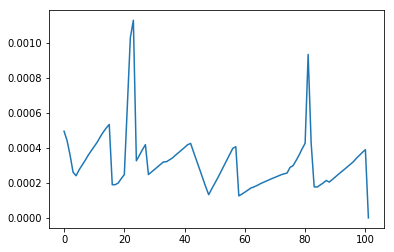

In [139]:
#plot graph of mean usage distribution

plt.plot(newList)
plt.show()

In [140]:
#K_S test to see if this vector comes from a normal distribution

#print(newList)
val =stats.kstest(newList, 'norm')
val

KstestResult(statistic=0.5, pvalue=0.0)